In [5]:
collection = "tweets_hayotrocamino"

In [6]:
import pandas as pd

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)

In [7]:
tweets = pd.read_csv('./csvs/%s_tweets.csv' % collection, encoding='utf8')

In [8]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

# Total de tuits

In [9]:
len(tweets)

223973

# Algunos ejemplos

In [10]:
tweets.head(10)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count
0,1101341840090021888,2019-03-01 04:42:11,RT @LanusUCiudadana: Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguim…,False,False,silvia coceres,2337452678,LanusUCiudadana,CristinaEsPueblo,1101302297324384256,"Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguimos organizándonos para recuperar la Nación, la Provincia y nuestro distrito de #Lanús de la mano de @CFKArgentina #HayOtroCamino Sumate! 👇🏼 #LanúsSomosTodxs https://t.co/l0tycUfqHY",23,14
1,1101343224889835522,2019-03-01 04:47:41,RT @UniCiudadanaAR: #HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,False,False,alberto parmigiano,1270472840,UniCiudadanaAR,HaganAlgo HayOtroCamino,1100514185216180225,#HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,805,340
2,1101343299686854657,2019-03-01 04:47:59,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,False,False,La Fonde,3302398083,NaN,NaN,1101343299686854657,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,0,0
3,1101344190456385536,2019-03-01 04:51:31,"RT @FerIglesias: Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no…",False,False,Lula Nomerompaslasbolas,2259370703,FerIglesias,NaN,1101280243485163520,"Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no puede fallar! https://t.co/VyAVyxF9BA",474,165
4,1101344538503856128,2019-03-01 04:52:54,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio… https://t.co/PLor5R7Wzr",False,False,Mateo J.,175564792,NaN,NaN,1101344538503856128,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio de la provincia. Las provincias del norte, gobernadas por peronistas, son las peores del país. Sus propuestas lo único que garantizan es decadencia. Ladrones.",0,0
5,1101345075957821440,2019-03-01 04:55:02,A este presidente no le interesa la crisis que están pasando los argentinos sino la bonanza que significa para sus… https://t.co/6IpTSNAIwx,False,False,Salta La Linda,2590449205,NaN,NaN,1101345075957821440,A este presidente no le interesa la crisis que están pasando los argentinos sino la bonanza que significa para sus intereses personales.,0,0
6,1101345125454831617,2019-03-01 04:55:14,RT @FerEspinozaOK: Ojalá que mañana el presidente nos diga la verdad a todos los argentinos y tome nuestras propuestas para salir de esta g…,False,False,Salta La Linda,2590449205,FerEspinozaOK,NaN,1101279671189209088,Ojalá que mañana el presidente nos diga la verdad a todos los argentinos y tome nuestras propuestas para salir de esta gravísima crisis económica #Unidos #HayOtroCamino #LaCalleHabla https://t.co/AIq7GDzO04,177,92
7,1101345325955063813,2019-03-01 04:56:02,RT @FerEspinozaOK: El empleo registrado se redujo en 191.300 puestos de trabajo entre diciembre de 2017 y el año pasado. El sector informal…,False,False,aufacundo,3628816157,FerEspinozaOK,NaN,1101262659012440065,"El empleo registrado se redujo en 191.300 puestos de trabajo entre diciembre de 2017 y el año pasado. El sector informal fue aún más perjudicado. Sin empleo y con tarifas impagables, el gobierno de Macri y Vidal ya fracasó. #Unidos #HayOtroCamino #LaCalleHabla",48,31
8,1101345370452434944,2019-03-01 04:56:12,"RT @FerIglesias: Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no…",False,False,Jorge🌱,2683902000,FerIglesias,NaN,1101280243485163520,"Clar

# Volumen de tuits por hora

In [41]:
# TODO: mostrar más ticks de hora en el eje x

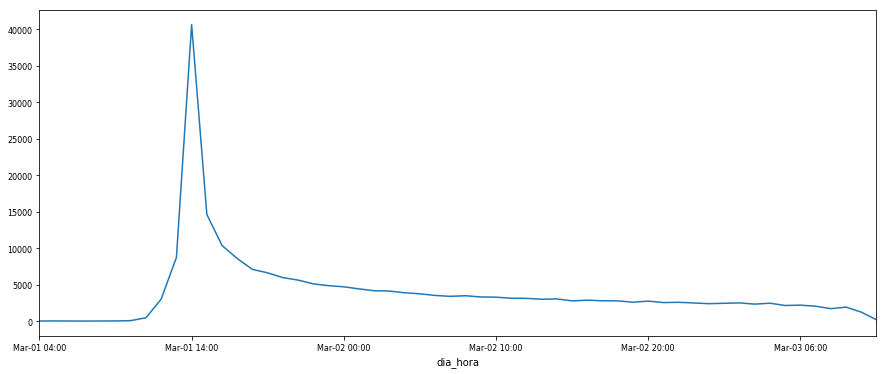

In [34]:
tweets["dia_hora"] = tweets.created_at.dt.strftime("%h-%d %H:00")
gb = tweets.groupby(tweets.dia_hora)["dia_hora"].count()
gb.plot(figsize=(15,6), fontsize=8)

# Tuits más retuiteados

In [39]:
idx = tweets.groupby(['original_id'])['retweet_count'].transform(max) == tweets['retweet_count']
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
221815,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21795,14091
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
191839,598170504831307776,3 de junio. Plaza Congreso. Basta de femicidios. #NiUnaMenos http://t.co/zQSz1ti3C7,4870,9045
153156,1036069043520909314,"#URGENTE Macri echa a Lopetegui y Quintana, hombres de Marcos Peña, y también elimina ministerios: Ciencia y Tecnología, Cultura, Energía, Agroindustria, Salud, Turismo, Ambiente, Trabajo y Modernización. Un desguace del Estado nunca antes visto. Lamentable por donde se lo mire.",11011,8689
190238,1069407274043621376,"Gente, agradecería si me ayudan a compartir esta investigación que hicimos en @eldestapeweb y que debería ser un escándalo nacional. El hermano de Macri recibió USD5.000.000 de la sospechosa empresa que ganó 6 parques eólicos revelado por @Emiliadelfino https://t.co/aEX8QFiFJW",6345,8273
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
171931,1035280236320120837,"No fue solo Macri. Hay otros responsables del hambre del pueblo: Lanata, Leuco, Majul, Del Moro y tantos que llenaron al pueblo de odio, hablando solo de Cristina y escondiendo el saqueo. Los hicieron votar a su victimario. Ahora quieren abrirse. son despreciables",12990,7544


# Tuits más faveados

In [ ]:
# TODO: evitar duplicados (por ej: el 9 y el 10)
# Aplicar misma solución a más retuiteados

In [40]:
idx = tweets.groupby(['original_id'])['favorite_count'].transform(max) == tweets['favorite_count']
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='favorite_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
221486,1101489748978421765,macri dijo con el apoyo del narcotrafico y quiso decir de gendarmeria aljsksj como te vas a equivocar asii presi hojos de sieloo,39017,5816
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
223913,1101559207579602945,macri en vez de decir con el apoyo del ejercito dijo con el apoyo DEL NARCOTRAFICO por dios nos gobierna paola argento,25889,5914
221815,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21795,14091
223512,1101487239710867456,dios macri acaba de decis “yo estoy aca por el voto de la gente los gritos e insultos hablan mas de ustedes que de mi” omg macri es una mili de 15 años,17780,1987
223534,1101487239710867456,dios macri acaba de decis “yo estoy aca por el voto de la gente los gritos e insultos hablan mas de ustedes que de mi” omg macri es una mili de 15 años,17780,1988


# Nube de palabras

In [42]:
import gensim
import re

def clean(s):
    s = gensim.utils.deaccent(s)
    s = s.strip().lower()
    s = s.replace("rt ", " ")

    # remove mentions
    s = re.sub(r"@\w+", " ", s)

    # remove URLs
    s = re.sub(r"https?://t\.co/\w+", " ", s)
    s = re.sub(
        r"https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        " ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"[^A-Za-z0-9ñ()\'\`#]", " ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)

    return s

In [51]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def tokenize(s):
    return [t for t in s.strip().split() if (t not in stopwords.words('spanish')
                                             and len(t) > 1
                                             and t[0] != '#'
                                             and t != "si")]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pablogcelayes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def get_all_tokens(tweets):
    all_tokens = []
    for tuit in tweets.text.apply(clean).unique():
        all_tokens += tokenize(tuit) + ['.']
    return all_tokens

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [58]:
all_tokens = get_all_tokens(tweets.sample(5000))

(-0.5, 799.5, 399.5, -0.5)

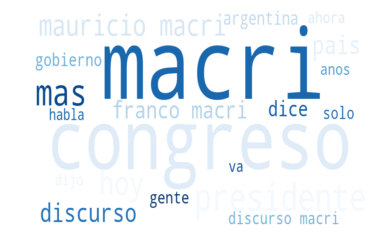

In [59]:
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

# Top hashtags por volumen de tuits

In [63]:
from collections import Counter

In [67]:
ht_counts = Counter()

In [68]:
for hts in tweets[~tweets.hts.isna()].hts.values:
    for ht in hts.split():
        ht_counts[ht] += 1

In [71]:
top10_hts = ht_counts.most_common(10)

<BarContainer object of 10 artists>

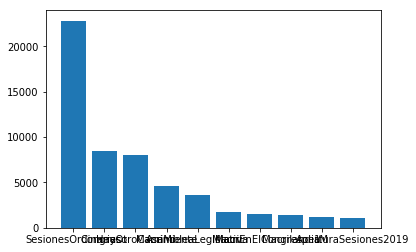

In [76]:
plt.bar(*zip(*top10_hts))

In [77]:
# TODO: arreglar tamaño de figura para que se lean los hashtags

In [78]:
top10_hts

[('SesionesOrdinarias', 22806),
 ('Congreso', 8466),
 ('HayOtroCamino', 8072),
 ('MacriMiente', 4573),
 ('AsambleaLegislativa', 3571),
 ('Macri', 1742),
 ('MacriEnElCongreso', 1507),
 ('Macrilandia', 1427),
 ('1M', 1218),
 ('AperturaSesiones2019', 1040)]

# Volumen hashtag por hora